In [ ]:
import matplotlib.pyplot as plt
import warnings
import pandas as pd

# Suppress Matplotlib warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.set_option('display.max_rows', 500)

### SimData: FP detection ratio

In [ ]:
import numpy as np 
import pandas as pd
import os, glob, math
import matplotlib 
matplotlib.rcParams["font.family"] = 'arial'
import palettable
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

for subdir in ["by_depth", "by_fpratio", "by_numclone", "by_numblock", "by_nummutation",  "proportions", "with_simpleKmeans", "Sex_chromosome", " FPdetection_ratio"]:
    OUTPUT_DIR = "/data/project/Alzheimer/YSscript/cle/Revision/" + str (subdir)
    if os.path.exists(OUTPUT_DIR) == False:
        os.system("mkdir -p " + OUTPUT_DIR)

tabl = palettable.tableau.Tableau_20.mpl_colors
safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

colorlist = [i for i in safe7]
colorlist = ["royalblue", "firebrick", "forestgreen", "darkorange", "saddlebrown", "chocolate",  "tan"]
colorlist = ["royalblue", "firebrick", "forestgreen", "darkorange", "#7161ef", "#957fef",  "#b79ced"]
colorlist = ["royalblue", "firebrick", "forestgreen", "darkorange", Gr_10[6], Gr_10[5], Gr_10[4]]
sns.set_style("white")
#sns.set_palette("tab10")
sns.set_palette(sns.color_palette(colorlist))



def FPdetection_ratio_SimData ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, NUM_CLONE_LIST, FP_RATIO_LIST, SIMDATA_LIST, BENCHMARK_LIST):
    long_df = pd.DataFrame ( columns = ["NUM_BLOCK", "NUM_CLONE", "BENCHMARK_NO", "NUM_MUTATION", "DEPTH_MEAN", "FP_RATIO", "SIMDATA", "tool", "MS", "ARI", "EC", "FPexistence", "FPindex", "FPnum", "FPnum_ratio"] )
    long_df = long_df.astype ({'FPexistence':'bool' } )
    for FP_RATIO in FP_RATIO_LIST:
        for SIMDATA in SIMDATA_LIST:         # "deocy, lump"
        
            for NUM_MUTATION in NUM_MUTATION_LIST:
                for DEPTH_MEAN in DEPTH_MEAN_LIST:

                    for NUM_CLONE in NUM_CLONE_LIST:
                        for NUM_BLOCK in NUM_BLOCK_LIST:                            
                            for BENCHMARK_NO in range (BENCHMARK_LIST[0], BENCHMARK_LIST[1] + 1):
                                INPUT_DIR = "/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) + "/" + str(BENCHMARK_NO)
                                if "bm.jpg" in INPUT_DIR:
                                    continue
                                if not os.path.exists ( INPUT_DIR ):
                                    print (INPUT_DIR + "없음")
                                    continue
                                if not os.path.exists ( INPUT_DIR + "/result/CLEMENT_decision.results.txt" ):
                                    print (INPUT_DIR + "/result/CLEMENT_decision.results.txt 없음" )
                                    continue
            
                                df1 = pd.read_csv ( INPUT_DIR + "/result/CLEMENT_decision.results.txt" , sep = "\t", header = None, index_col = 0)
                                df2 = pd.read_csv ( INPUT_DIR + "/result/CLEMENT_decision.membership_count.txt" , sep = "\t").T

                                boo = True if df1.loc ["FPexistence"][1] == "True" else False
                                
                                if (FP_RATIO != 0.0) & (df1.loc ["FPexistence"][1] == "True"):
                                    long_df.loc[len(long_df.index)] = [ NUM_BLOCK, NUM_CLONE, BENCHMARK_NO, NUM_MUTATION, DEPTH_MEAN, FP_RATIO, SIMDATA, "CLEMENT_decision", int(df1.loc ["score"][1].split("/")[0]), float(df1.loc ["ARI"][1]), int(df1.loc ["NUM_CLONE"][1]), boo, df1.loc ["FPindex"][1],  int( df2.loc [ df1.loc ["FPindex"][1] ] [0]),  int (df2.loc [ df1.loc ["FPindex"][1] ] [0])  / (NUM_MUTATION * FP_RATIO )  ]   # 맨 끝에 하나씩 추가
                                elif FP_RATIO == 0.0:
                                    if (df1.loc ["FPexistence"][1] == "True"):
                                        long_df.loc[len(long_df.index)] = [ NUM_BLOCK, NUM_CLONE, BENCHMARK_NO, NUM_MUTATION, DEPTH_MEAN, FP_RATIO, SIMDATA, "CLEMENT_decision", int(df1.loc ["score"][1].split("/")[0]), float(df1.loc ["ARI"][1]), int(df1.loc ["NUM_CLONE"][1]), boo, df1.loc ["FPindex"][1],  int( df2.loc [ df1.loc ["FPindex"][1] ] [0]),  None  ]   # 맨 끝에 하나씩 추가
                                    else:
                                        long_df.loc[len(long_df.index)] = [ NUM_BLOCK, NUM_CLONE, BENCHMARK_NO, NUM_MUTATION, DEPTH_MEAN, FP_RATIO, SIMDATA, "CLEMENT_decision", int(df1.loc ["score"][1].split("/")[0]), float(df1.loc ["ARI"][1]), int(df1.loc ["NUM_CLONE"][1]), boo, None,  None,  None  ]   # 맨 끝에 하나씩 추가
                            
            long_df["MS"] = long_df["MS"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 normalize 

            # # Visualization
            # drawfigure_3column (long_df, RMSE_df, 'NUM_CLONE', "NUM_BLOCK", NUM_CLONE_LIST, NUM_BLOCK_LIST, "SIMDATA - {} & {}".format (FP_RATIO, SIMDATA), "/data/project/Alzheimer/YSscript/cle/Revision/by_numclone/1.SimData-byclone_{}_{}.pdf".format (FP_RATIO, SIMDATA))
    return long_df

if __name__ == "__main__":
    global toollist
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]

    # SimData : decoy, lump
    NUM_BLOCK_LIST = [ 1, 2, 3 ]             # 1, 2, 3
    NUM_MUTATION_LIST = [ 1000, 500, 100 ]    # 100, 500, 100
    DEPTH_MEAN_LIST = [ 250, 125, 30 ]       # 250, 125, 30
    FP_RATIO_LIST = [ 0.0, 0.1  ]        # 0.0, 0.1
    SIMDATA_LIST = [ "decoy", "lump"] # "decoy", "lump"
    NUM_CLONE_LIST = [2, 3, 4, 5, 6, 7]      # 2, 3, 4, 5, 6, 7
    BENCHMARK_LIST = [0, 3]
    long_df = FPdetection_ratio_SimData ( [1], [500], [250], NUM_CLONE_LIST, [0.0, 0.1], ["decoy", "lump"],  BENCHMARK_LIST  )

    long_df
    # # CellData 
    # NUM_BLOCK_LIST = [  1, 2, 3  ]             # 1, 2, 3
    # NUM_MUTATION_LIST = [1000, 500, 100]    # 1000, 500, 100
    # DEPTH_MEAN_LIST = [250, 125, 30]       # 250, 125, 30
    # NUM_PARENT_LIST = [ 0, 1 ]       # 0 , 1
    # FP_RATIO_LIST = [ 0.0  ]        # 0.0, 0.1
    # AXIS_RATIO_LIST = [ -1 ]        # -1, 0.0, 0.2
    # long_df = FPdetection_ratio_CellData ( NUM_BLOCK_LIST, [ 500 ], [250], [0, 1], [0.0], [-1] )


/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n500_250x/lump/0.1/clone_7/0/result/CLEMENT_decision.results.txt 없음
/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n500_250x/lump/0.1/clone_7/2/result/CLEMENT_decision.results.txt 없음


<Axes: xlabel='SIMDATA', ylabel='count'>

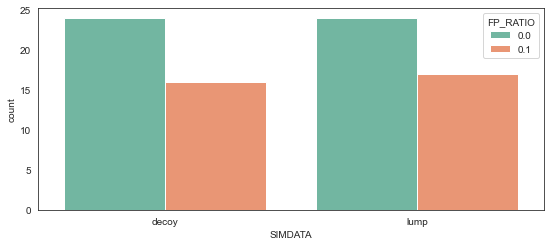

In [ ]:
fig, ax = plt.subplots( nrows = 1, ncols = 1, figsize = (7.8 , 4 ))
fig.subplots_adjust ( wspace = 0.4, bottom = 0.15, top = 0.85, left = 0.08, right = 0.98)

#sns.countplot ( long_df, x = "SIMDATA", hue = "FPexistence", ax = ax)
sns.countplot(data=long_df, x="SIMDATA", hue="FP_RATIO", hue_order=[0.0, 0.1], palette="Set2", ax = ax)

In [ ]:
pd.DataFrame ( long_df.groupby ( ["SIMDATA", "FP_RATIO","NUM_CLONE"])["FPexistence"] .sum() )

long_df [ (long_df ["SIMDATA"] == "decoy") & (long_df["FP_RATIO"] == 0.0) ]

long_df

---

### CellData 1D: FP의 VAF, BQ
- /data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n500_125x/parent_0/fp_0.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib 
matplotlib.rcParams["font.family"] = 'arial'
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, glob

kwargs = {}

NUM_BLOCK_LIST = [ 1 ]             # 1, 2, 3
NUM_MUTATION_LIST = [ 500 ]    # 1000, 500, 100
DEPTH_MEAN_LIST = [ 250 ]       # 250, 125, 30
NUM_PARENT_LIST = [ 0 ]       # 0 , 1
FP_RATIO_LIST = [ 0.1  ]        # 0.0, 0.1
AXIS_RATIO_LIST = [ -1 ]        # -1, 0.0, 0.2

def CellData_FP_BQVAF ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, NUM_PARENT_LIST, FP_RATIO_LIST, AXIS_RATIO_LIST, BENCHMARK_LIST ):
    df_concat_all = pd.DataFrame ( columns = ["ANSWER_MEMBERSHIP",	"NPVAF", "NPBQ",	"NUM_MUTATION",	"NUM_BLOCK",	"DEPTH_MEAN",	"NUM_PARENT",	"FP_RATIO",	"SAMPLE",	"BENCHMARK_NO" ] )
    
    for NUM_MUTATION in NUM_MUTATION_LIST:
        for NUM_BLOCK in NUM_BLOCK_LIST:
            for DEPTH_MEAN in DEPTH_MEAN_LIST:
                for NUM_PARENT in NUM_PARENT_LIST:
                    for FP_RATIO in FP_RATIO_LIST:
                        SAMPLE_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/parent_" + str (NUM_PARENT) + "/fp_" + str(FP_RATIO) + "/axis_-1/*" ) )
                
                        for SAMPLE_DIR in SAMPLE_DIR_LIST:
                            if os.path.isdir( SAMPLE_DIR ) == False:
                                continue

                            SAMPLE = SAMPLE_DIR.split("/")[-1]
                            for BENCHMARK_NO in range (BENCHMARK_LIST[0], BENCHMARK_LIST[1] + 1):
                                INPUT_ANSWER_MEMBERSHIP = SAMPLE_DIR + "/" + str(BENCHMARK_NO) + "/0.input_membership_letter.txt"
                                INPUT_NPVAF = SAMPLE_DIR + "/" + str(BENCHMARK_NO) + "/0.input_npvaf.txt"
                                INPUT_NPBQ = SAMPLE_DIR + "/" + str(BENCHMARK_NO) + "/0.input_npBQ.txt"
                                if not os.path.exists ( INPUT_ANSWER_MEMBERSHIP ):
                                    print ("{}없음".format (INPUT_ANSWER_MEMBERSHIP))
                                    continue

                                df_ANSWER_MEMBERSHIP = pd.read_csv (INPUT_ANSWER_MEMBERSHIP, sep = "\t", header = None)
                                df_NPVAF = pd.read_csv (INPUT_NPVAF, sep = "\t", header = None)
                                df_NPBQ = pd.read_csv (INPUT_NPBQ, sep = "\t", header = None)
                                df_concat = pd.concat ( [df_ANSWER_MEMBERSHIP, df_NPVAF, df_NPBQ], axis = 1)
                                df_concat.columns = ["ANSWER_MEMBERSHIP", "NPVAF", "NPBQ"]
                                df_concat ["NUM_MUTATION"], df_concat ["NUM_BLOCK"], df_concat ["DEPTH_MEAN"], df_concat["NUM_PARENT"], df_concat["FP_RATIO"] = NUM_MUTATION, NUM_BLOCK, DEPTH_MEAN, NUM_PARENT, FP_RATIO
                                df_concat ["SAMPLE"] = SAMPLE
                                df_concat ["BENCHMARK_NO"] = BENCHMARK_NO
                                #print (SAMPLE_DIR + "/" + str(BENCHMARK_NO), df_ANSWER_MEMBERSHIP.shape, df_NPVAF.shape, df_NPBQ.shape, df_concat.shape)
                            df_concat_all = pd.concat ( [df_concat_all, df_concat], axis = 0, ignore_index = True)
                            


    return df_concat_all

if __name__ == "__main__":
    kwargs = {}

    # CellData 
    NUM_BLOCK_LIST = [  1  ]             # 1, 2, 3
    NUM_MUTATION_LIST = [ 500 ]    # 1000, 500, 100
    DEPTH_MEAN_LIST = [ 125 ]       # 250, 125, 30
    NUM_PARENT_LIST = [ 0 ]       # 0 , 1
    FP_RATIO_LIST = [ 0.1  ]        # 0.0, 0.1
    AXIS_RATIO_LIST = [ -1 ]        # -1, 0.0, 0.2
    df_concat_all = CellData_FP_BQVAF ( NUM_BLOCK_LIST, [ 500 ], [125], [0], [0.1], [-1], [0, 3] )

In [ ]:
df_concat_all.groupby (["ANSWER_MEMBERSHIP"])[["NPVAF", "NPBQ"]].mean()

In [ ]:
import warnings, palettable

fig, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (15.92 , 10))
fig.subplots_adjust ( wspace = 0.25, bottom = 0.2, top = 0.80, left = 0.03, right = 0.98)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

tabl = palettable.tableau.Tableau_20.mpl_colors
safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

colorlist = [i for i in tabl]
sns.set_style("white")
#sns.set_palette("tab10")
sns.set_palette(sns.color_palette(colorlist))

# Create a grouped bar graph    
sns.boxplot(data = df_concat_all, x = 'ANSWER_MEMBERSHIP', y = "NPVAF", hue = "SAMPLE", ax = ax [0])
sns.violinplot(data = df_concat_all, x = 'ANSWER_MEMBERSHIP', y = "NPBQ", hue = "SAMPLE", ax = ax [1])

for ax_individual in ax:
    ax_individual.set_xlabel( '' )
    ax_individual.set_ylabel( ax_individual.get_ylabel(), fontsize = 15, fontweight = "semibold"  )
    

    ax_individual.yaxis.set_label_coords( -0.09, 0.5)  # ylabel을 이동 (- 왼쪽)
    ax_individual.tick_params(axis = 'x', labelsize=14)
    ax_individual.tick_params(axis = 'y', labelsize=14)      # pad = -1.0, 
    sns.despine ( top = True, right = True, ax = ax_individual)
    for axis in ['left','bottom']:
        ax_individual.spines[axis].set_linewidth(2)
    ax_individual.legend_.remove()
